In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.preprocessing import LabelEncoder

In [5]:
#Importing the dataset
#The file "dataset_0.csv" contains the pre procesed data 
dataset = pd.read_csv('dataset_0.csv')


In [12]:
#In order to find whether we have missing data, 
# we plot the number on entries that we have
# and compare it with number of valid value in each attribute 

print ("The number of tuples in the dataset is :", dataset.shape[0])
print("----------------------------------------")
print ("The number of valid attributes in the dataset is :\n", dataset.count())

The number of tuples in the dataset is : 614
----------------------------------------
The number of valid attributes in the dataset is:
 Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64


In [13]:
#Find missing data : check all the values that are equal to null <=> nan
missing = dataset.apply(lambda x: sum(x.isnull()),axis=0) 

print(missing)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [14]:
'''FILL THE MISSING DATA'''

'FILL THE MISSING DATA'

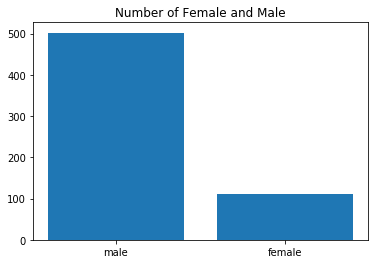

In [38]:
#GENDER : Male | Female
#We count occurences of each gender to determine the value of the Mode
count_gender = dataset['Gender'].value_counts()
gender = ('male','female')

#Plot the bar chart showing number of Female and Male
plt.bar(np.arange(len(count_gender)), count_gender)
plt.title('Number of Female and Male')
plt.xticks(np.arange(len(count_gender)),gender)
plt.savefig('count_gender.jpg')
plt.show()

#Filling the Nan values with the value 'Male', because it represent the Mode 
dataset['Gender'].fillna('Male',inplace=True)

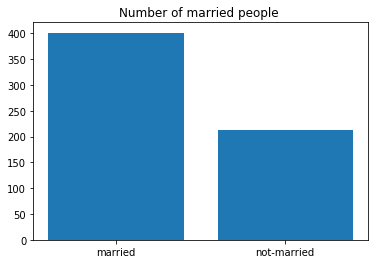

In [39]:
#MARRIED : Yes | No
count_married = dataset['Married'].value_counts()

married = ('married','not-married')

#Plot the bar chart showing number of Married people
plt.bar(np.arange(len(count_married)), count_married)
plt.title('Number of married people ')
plt.xticks(np.arange(len(count_married)),married)
plt.savefig('count_married.jpg')
plt.show()


#Filling the Nan with the value 'Yes'
dataset['Married'].fillna('Yes',inplace=True)

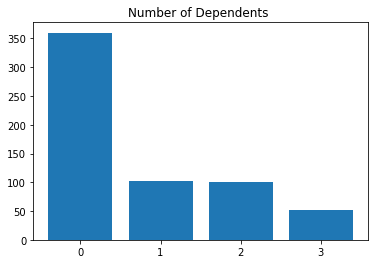

In [37]:
#Dependents : 0 | 1 | 2 | 3
#Number of people that each client is taking care of;
count_dependent = dataset['Dependents'].value_counts()

dependent = ('0','1','2','3') 

#Plot the bar chart showing number of Dependents
plt.bar(np.arange(len(count_dependent)), count_dependent)
plt.title('Number of Dependents ')
plt.xticks(np.arange(len(count_dependent)),dependent)
plt.savefig('count_dependent.jpg')
plt.show()

#Filling the Nan with the value '0'
dataset['Dependents'].fillna('0',inplace=True)

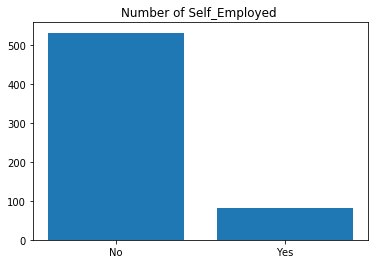

In [41]:
#Self_Employed : Yes | No 
count_self = dataset['Self_Employed'].value_counts()

Self_Employed = ('No','Yes') 

#Plot the bar chart showing number of Self_Employed
plt.bar(np.arange(len(count_self)), count_self)
plt.title('Number of Self_Employed ')
plt.xticks(np.arange(len(count_self)), Self_Employed)
plt.savefig('count_Self_Employed.jpg')
plt.show()

#Filling the Nan with the value 'No'
dataset['Self_Employed'].fillna('No',inplace=True)

In [71]:
#Loan_Amount_Term : Yes | No 

Loan_Amount_Term_count = dataset['Loan_Amount_Term'].value_counts()

print("Count of Terms for Loans:\n",Loan_Amount_Term_count)


#Filling the Nan with the value 'No'
dataset['Loan_Amount_Term'].fillna(360.0,inplace=True)

Count of Terms for Loans:
 360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


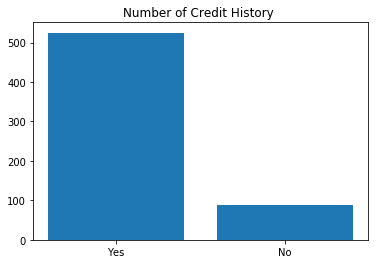

In [79]:
#Credit_History : 0 | 1 
count_credit_history = dataset['Credit_History'].value_counts()
credit_History = ('Yes','No') 

#Plot the bar chart showing number of Self_Employed
plt.bar(np.arange(len(count_credit_history)), count_credit_history)
plt.title('Number of Credit History ')
plt.xticks(np.arange(len(count_credit_history)), credit_History)
plt.savefig('count_credit_History.jpg')
plt.show()


#Filling the Nan with the value '1.0'
dataset['Credit_History'].fillna(1.0, inplace=True)

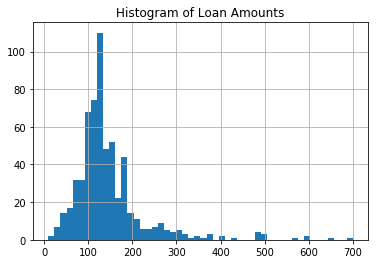

In [82]:
#LoanAmount consists of continuous values
#We consider the Histogram, which should give the distribution of the values
dataset['LoanAmount'].hist(bins=50)
plt.title('Histogram of Loan Amounts')
plt.savefig('LoanAmount.jpg')


#Fill the missing values with the Median, because it is more stable to outliers comapred to the Mean
dataset['LoanAmount'].fillna(dataset['LoanAmount'].median(), inplace=True)

In [84]:
'''ANALYSING CONTINOUS VALUES'''

'ANALYSING CONTINOUS VALUES'

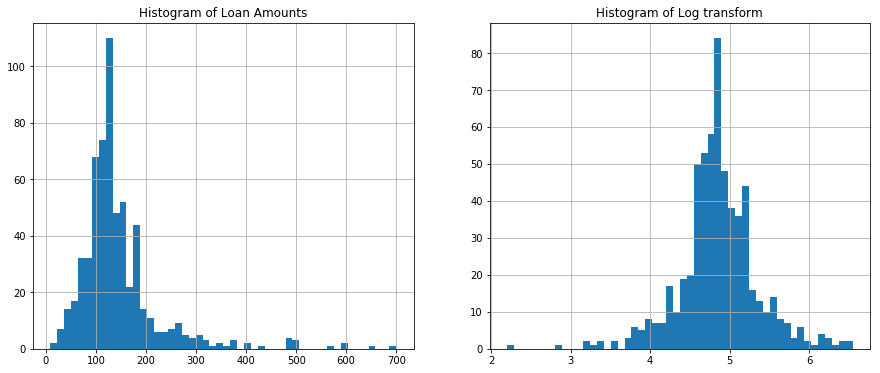

In [103]:
#LOAN AMOUNT
figure(figsize=(15, 6))

plt.subplot(121) 
dataset['LoanAmount'].hist(bins=50)
plt.title('Histogram of Loan Amounts')

#The orginal data contains some extreme values of loan, which if we leave, will negatively affect 
#the performance of the model, since they will be considered as outliers
#We apply the Log Transformation on the data to normalize the distribution

plt.subplot(122)
dataset['LoanAmount_log'] = np.log(dataset['LoanAmount'])
dataset['LoanAmount_log'].hist(bins=50)
plt.title('Histogram of Log transform')

plt.savefig('LoanAmount_Transform.jpg')

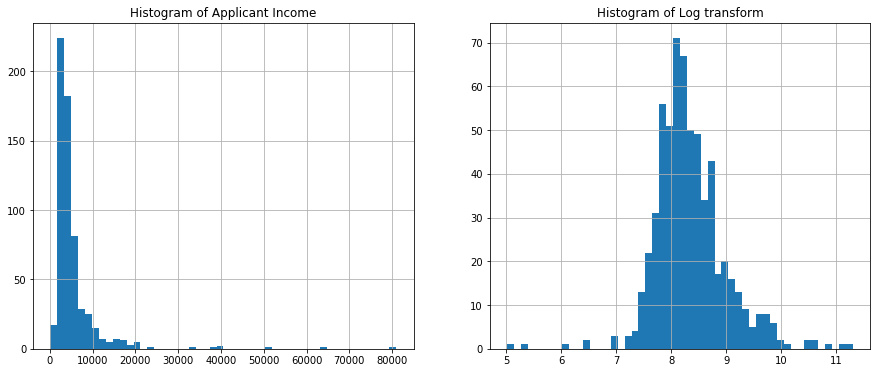

In [102]:
#APPLICANT INCOME
#We plot the Histogram of the Applicant Income in order to get a sense of how the data are distributed.

figure(figsize=(15, 6))

plt.subplot(121)
dataset['ApplicantIncome'].hist(bins=50)
plt.title('Histogram of Applicant Income')

plt.subplot(122)
dataset['ApplicantIncome_log'] = np.log(dataset['ApplicantIncome'])
dataset['ApplicantIncome_log'].hist(bins=50)
plt.title('Histogram of Log transform')

plt.savefig('ApplicantIcome_Transform.jpg')

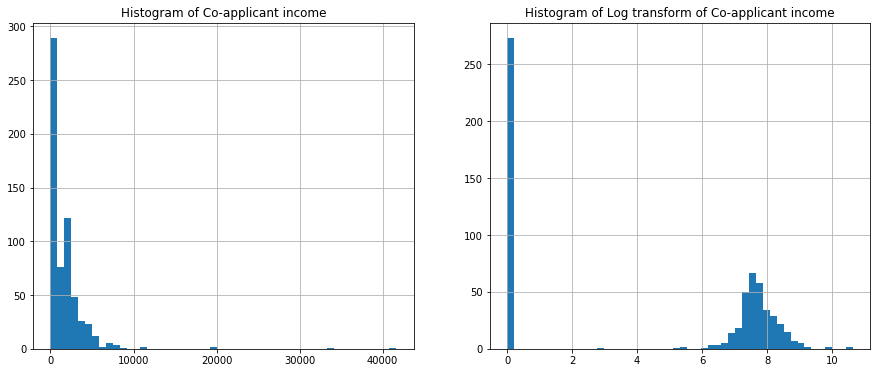

In [105]:
#CO-APPLICANT INCOME
#We plot the Histogram of the Co-applicant income in order to get a sense of how the data are distributed.

figure(figsize=(15, 6))

plt.subplot(121)
dataset['CoapplicantIncome'].hist(bins=50)
plt.title('Histogram of Co-applicant income')

plt.subplot(122)
dataset['CoapplicantIncome_log'] = np.log1p(dataset['CoapplicantIncome'])
dataset['CoapplicantIncome_log'].hist(bins=50)

plt.title('Histogram of Log transform of Co-applicant income')
plt.savefig('Co-applicant_income_transform.jpg')

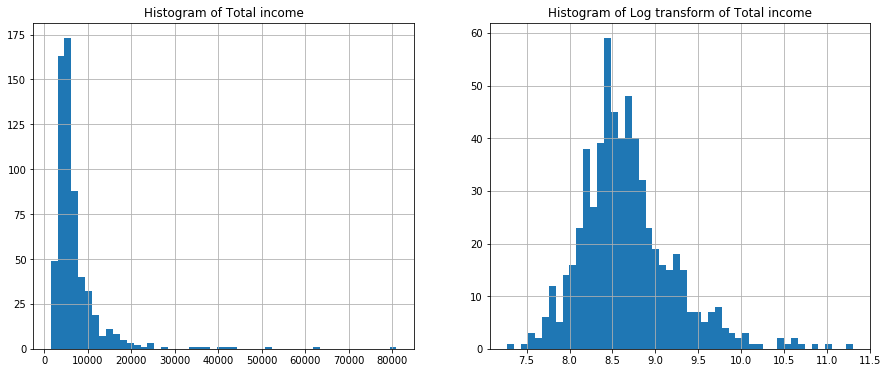

In [112]:
#Because the co-applicant income has this pick in the the value zero,
# it would be better to combine both values of "ApplicantIncome" and "CoapplicantIncome"
#Later in the Training, we shall discover which effect will this operation have.

dataset['TotalIncome'] = dataset['ApplicantIncome'] + dataset['CoapplicantIncome']


figure(figsize=(15, 6))
plt.subplot(121)
dataset['TotalIncome'].hist(bins=50)
plt.title('Histogram of Total income')

plt.subplot(122)
dataset['TotalIncome_log'] = np.log(dataset['TotalIncome'])
dataset['TotalIncome_log'].hist(bins=50)

plt.title('Histogram of Log transform of Total income')
plt.savefig('Total_income_transform.jpg')

In [128]:
'''Label Encoding of the Catecorigal Variables'''


var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

labelencoder = LabelEncoder()
for i in var_mod:
    dataset[i] = labelencoder.fit_transform(dataset[i])

In [129]:
'''SAVE THE PRE PROCESSED DATA TO A NEW FILE'''

'SAVE THE PRE PROCESSED DATA TO A NEW FILE'

In [130]:
#After filling all the missing value, we save the data back to the csv file
#We split the file into training and test

dataset.loc[:513].to_csv('Dataset_Train.csv')

dataset.loc[514:].to_csv('Dataset_Test.csv')